In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df_Train=pd.read_csv('fraudTrain.csv')
df_Train.drop_duplicates(inplace=True)
df_Train.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
columns=np.array(df_Train.columns)
print(columns)

['Unnamed: 0' 'trans_date_trans_time' 'cc_num' 'merchant' 'category' 'amt'
 'first' 'last' 'gender' 'street' 'city' 'state' 'zip' 'lat' 'long'
 'city_pop' 'job' 'dob' 'trans_num' 'unix_time' 'merch_lat' 'merch_long'
 'is_fraud']


In [4]:
df_Train['is_fraud'].value_counts(),df_Train['is_fraud'].unique(),df_Train['is_fraud'].unique().__len__()

(is_fraud
 0    1289169
 1       7506
 Name: count, dtype: int64,
 array([0, 1]),
 2)

In [ ]:
df_Train= df_Train.drop(columns=['Unnamed: 0', 'first', 'last', 'trans_num','trans_date_trans_time','dob','unix_time', 'lat', 'long', 'merch_lat', 'merch_long'])
columns=np.array(df_Train.columns)
print("Final Shape of Dataset : ",df_Train.shape)
print("Final Available Columns : ",columns)

Final Shape of Dataset :  (1296675, 12)
Final Available Columns :  ['cc_num' 'merchant' 'category' 'amt' 'gender' 'street' 'city' 'state'
 'zip' 'city_pop' 'job' 'is_fraud']


In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['gender', 'category', 'job', 'merchant', 'cc_num', 'street', 'city', 'state', 'zip']
for col in cat_cols:
    le = LabelEncoder()
    df_Train[col] = le.fit_transform(df_Train[col].astype(str))

In [ ]:
X = df_Train.drop(columns=['is_fraud'])
y = df_Train['is_fraud']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
print("Final Random Forest Model Performance on fraudTrain.csv Dataset")
print(f"    Training Accuracy : {rf.score(X_train, y_train)*100} %")
print(f"    Testing Accuracy  : {rf.score(X_test,y_test)*100} % ")

Final Random Forest Model Performance on fraudTrain.csv Dataset
    Training Accuracy : 99.99951799795632 %
    Testing Accuracy  : 99.72930765226444 % 


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

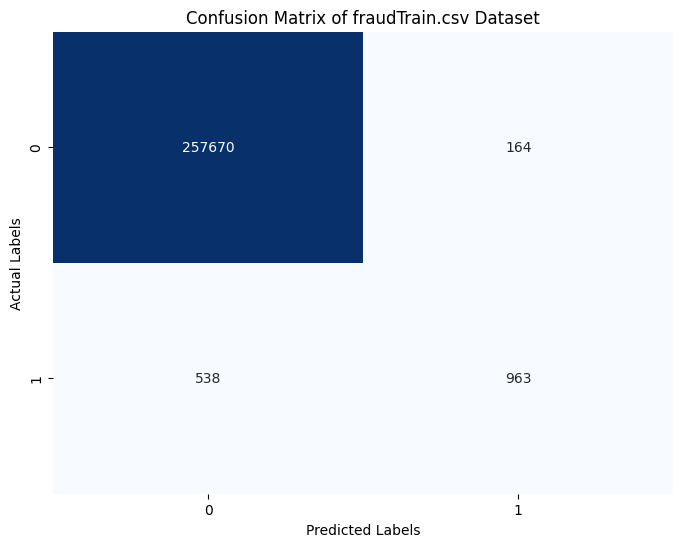

In [11]:
cm = confusion_matrix(y_test, rf.predict(X_test))
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix of fraudTrain.csv Dataset")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [12]:
#Operation on fraudTest.csv Dataset
df_Test=pd.read_csv('fraudTest.csv')
df_Test.drop_duplicates(inplace=True)
df_Test.dropna(inplace=True)
df_Test=df_Test.drop(columns=['Unnamed: 0', 'first', 'last', 'trans_num', 'trans_date_trans_time', 'dob', 'unix_time', 'lat', 'long', 'merch_lat', 'merch_long']
)
columns_test=np.array(df_Test.columns)
print("Final Shape of Dataset : ",df_Test.shape)
print("Final Available Columns : ",columns_test)

Final Shape of Dataset :  (555719, 12)
Final Available Columns :  ['cc_num' 'merchant' 'category' 'amt' 'gender' 'street' 'city' 'state'
 'zip' 'city_pop' 'job' 'is_fraud']


In [13]:
for col in cat_cols:
    le2= LabelEncoder()
    df_Test[col] = le2.fit_transform(df_Test[col].astype(str))

In [14]:
X1 = df_Test.drop(columns=['is_fraud'])
y1= df_Test['is_fraud']
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)

In [15]:
print("Final Random Forest Model Performance on fraudTest.csv Dataset")
print(f"    Training Accuracy : { rf.score(X1_train, y1_train)*100} %")
print(f"    Testing Accuracy  : {rf.score(X1_test, y1_test)*100} % ")

Final Random Forest Model Performance on fraudTest.csv Dataset
    Training Accuracy : 99.74357532474836 %
    Testing Accuracy  : 99.74627510256964 % 


In [16]:
from sklearn.metrics import confusion_matrix
y1_pred = rf.predict(X1_test)
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_pred))


Confusion Matrix:
 [[110638     77]
 [   205    224]]


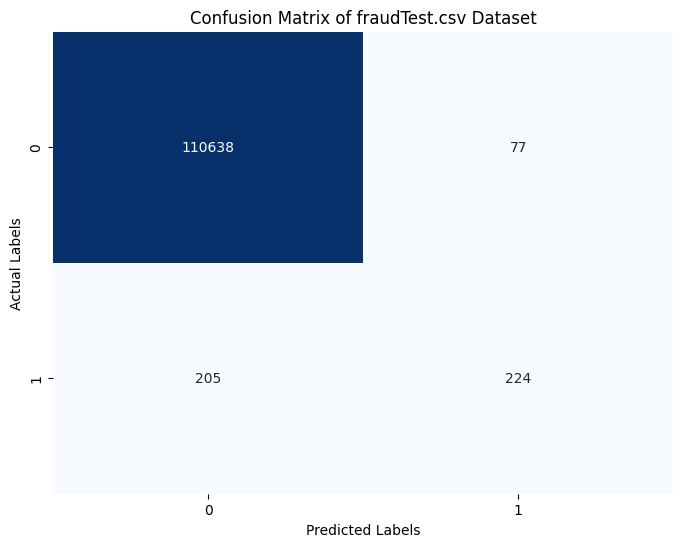

In [17]:

cm2 = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix of fraudTest.csv Dataset")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()